# **지도학습(Supervised) 알고리즘:** 회귀분석

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Machine-Learning/blob/main/Lecture3-2_MachineLearning_SupervisedRegClass_KK.ipynb)

---

<center><img src='Image/Expert/Advanced_Algorithms_SupervisedRegression.png' width='900'></center>

<!-- (https://thaddeus-segura.com/intro_to_ml/) -->

---

**0) 실제 데이터분석 접근 방법:** `편향과 분산 모두 최소화`하기 위해 `반복적`으로 업데이트

<center><img src='Image/Expert/Bias_Variance4.png' width='400'></center>

> **"`Train` 데이터의 `Bias가 적절(낮게)`한지 확인 후, `Test 데이터`에 적용하여 `Variance가 적절(낮게)하도록 반복적 업데이트`"**
>
> - Train의 Bias가 높다면,  `빅데이터(Row & Column)` 또는 `알고리즘 복잡하게` 또는 `최적화`를 통해 해결
>
> - Test의 Variance가 높다면, `빅데이터(Row) & 스몰데이터(Column)` 또는 `알고리즘 덜 복잡하게` 또는 `최적화`를 통해 해결
>
> <center><img src='Image/Expert/Bias_Variance_Reduce.png' width='600'></center>
>
> - **딥러닝(인공지능 알고리즘):** 딥러닝은 `엄청나게 복잡한 모델`이며 `Bias-variance Trade-off를 피할 수 없음`
>
> - `스몰데이터`의 딥러닝은 `과대적합`되어 `High Variance`가 우려되기에, `딥러닝`으로 성능을 내기 위해선 `빅데이터`가 반드시 필요!
>
> - `빅데이터`를 통해 `Train과 Test의 패턴 차이 감소`되어 `Bias & Variance를 모두 감소시키기 유리`

---

**1) 정규화 방법론:** 

> **"`모델링`은 `목적` 달성을 위해 특정 `비용함수`를 최소화 하는 `최적화 알고리즘`을 사용하여 `분석 알고리즘`을 최적화하여 `문제해결`하는 것"**
>
> | | **Regression** | **Classification** |
|:-:|:-|:-|
| **분석목적** | 수치 예측 | 라벨 예측 |
| **분석단계** |  |  |
| <span style="color:blue">전처리</span> | 동일 | 동일 |
| <span style="color:red">Base 알고리즘</span> | Linear Regression | Logistic Regression |
| <span style="color:blue">특징</span> | 선형 | 선형 |
| <span style="color:red">비용함수</span> | $(Y - \hat{Y})^2$ | $-\hat{Y}log(Pr(\hat{Y}))$ $-$ $(1-\hat{Y})log(1-Pr(\hat{Y}))$ |
| <span style="color:red">검증지표</span> | MSE<br>     MAE<br>     RMSE<br>     MAPE<br>     R^2<br>     F검정<br>     t검정<br>     Log-Likelihood<br>     AIC<br>     BIC | Log-Likelihood<br>     Confusion Matrix<br>     Accuracy<br>     Precision<br>     Recall<br>     F1-score<br>     Classification Report<br>     ROC<br>     AUC |
| <span style="color:red">잔차진단</span> | 정규분포<br>     자기상관<br>     등분산성 | - |
| **Advanced 알고리즘** | - Linear regression<br>     - Polynomial regression<br>     - Stepwise regression<br>     - Ridge/Lasso/ElasticNet regression<br>     - Bayesian Linear regression<br>     - Quantile regression<br>     - Decision Tree regression<br>     - Random Forest regression<br>     - Support Vector regression | - Logistic Regression<br>     - Ordinal Regression<br>     - Cox Regression<br>     - Naïve Bayes<br>     - Stochastic Gradient Descent<br>     - K-Nearest Neighbours<br>     - Decision Tree<br>     - Random Forest<br>     - Support Vector Machine |
>
> - **Linear Regression:** `수치예측`을 위해 `MSE 비용함수`를 최소화 하는 `최소제곱법`을 사용하여 `Linear Regression`을 최적화하여 `가중치를 추정(문제해결)`
>
> - **Logistic Regression:** `분류예측`을 위해 `Cross Entropy 비용함수`를 최소화 하는 `수치해석 방법론`을 사용하여 `Logistic Regression`을 최적화하여 `가중치를 추정(문제해결)`
>
> - 결국 모델링은 `다양한 가중치/계수/파라미터 후보`들 중에서 `비용함수`에 따라 `특정 가중치/계수/파라미터가 선택`되는 과정

---

- **정규화(Regularized):** 

> **"`비용함수`에 `제약`을 적용하여 추정해야 하는 `가중치/계수/파라미터`의 `범위/자유도`를 제한하여 `급격한 수치의 가중치/계수/파라미터`가 추정되지 않도록 하여 `과대적합` 발생을 줄이는 방법론"**
>
> <center><img src='Image/Expert/Regularization_Intuition.png' width='500'></center> 
>
> - **접근:** `과적합` 가능성이 있을 시 `비용함수`에 제약/패널티를 부과
>
> - **결과:** 추정 가중치의 `갯수를 줄이거나 크기를 조정`하여 `모델 단순화` 및 `비극단적 수치 추청`
>
> - **성능:** 
>
>> - 모델이 단순화되기 때문에, `Variance 감소` 상대적으로 `Bias 증가` (by Bias-variance Trade-off)
>> - Linear Regression에선 $X^TX$의 `역행렬 미존재 이슈`가 있지만 `정규화 알고리즘은 역행렬 항상 존재`
>
> - **동의어:** `Regularized` Method, `Penalized` Method, `Contrained` Least Squares


## 정규화 방법론(Regularized Method)

**0) Linear Regression:** `MSE`를 비용함수로 사용

<center>
$\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2\Biggr]$
</center>

---

**1) Ridge Regression:** 

- **정규화조건/패널티/제약조건:** 모든 `가중치`($w$)들의 `제곱합`을 비용함수에 `추가`

\begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}

- **하이퍼파라미터($\lambda$):** 기존 `MSE`에 추가될 `제약 조건의 비중`

> - $\lambda$=0: 일반적인 Linear Regression
>
> - $\lambda$가 커지면, `정규화(패널티)` 정도가 `커지기` 때문에 `가중치`($w_i$) `작아짐`
>
> - $\lambda$가 작아지면, `정규화(패널티)` 정도가 `작아` 지기 때문에 `가중치`($w_i$) 자유도가 높아져 `커짐`

<center><img src='Image/Expert/Regularization_Ridge.png' width='500'>(https://livebook.manning.com/book/machine-learning-for-mortals-mere-and-otherwise/chapter-9/v-4/82)</center> 

---

**2) Lasso(Least Absolute Shrinkage and Selection Operator) Regression:**  

- **정규화조건/패널티/제약조건:** 모든 `가중치`($w$)들의 `절대값 합`을 비용함수에 `추가` 

\begin{align*}
\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \left|w_i \right|\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}

<center><img src='Image/Expert/Regularization_Lasso.png' width='500'>(https://livebook.manning.com/book/machine-learning-for-mortals-mere-and-otherwise/chapter-9/v-4/82)</center> 

---

**3) Elastic Net:** `Ridge` + `Lasso`
- **정규화조건/패널티/제약조건:** 추정 `가중치`의  `절대값 합`과 `제곱합`을 동시에 최소

\begin{align*}
\hat{w} &= \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda_1 \displaystyle \sum_{i=0}^k \left|w_i \right| + \lambda_2 \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\ &where~\lambda_1~and~\lambda_2~are~hyper~parameters(given~by~human)
\end{align*}


## 하이퍼파라미터에 따른 결과비교

**1) 파라미터 vs 하이퍼파라미터:**

- **파라미터(Parameter):** `데이터`의 의해 결정되는 모델의 성질을 의미하는 `가중치/계수/매개변수`
- **하이퍼파라미터(Hyperparameter):** 모델링 할 때 `사용자/분석가`가 직접 결정하는 값

> - 정해진 `최적` 값은 `없음`
> - 통계추론 알고리즘 외에 `머신러닝/딥러닝`으로 갈수록 `하이퍼파라미터의 갯수`는 늘어남
> - 일반적으로 `자동화`란, `머신러닝/딥러닝`은 사람에 따라 결과가 달라질 수 있기 때문에 `하이퍼파라미터`를 고성능 컴퓨터를 사용해서 모든 경우의 수를 실행하며 `최적화`하는 과정

**2) 하이퍼파라미터 최적화에 따른 학습/예측 성능:** `예측`을 잘 하려면 `별도 추정` 필요

> - **Train:** 하이퍼파라미터가 `작을수록` 성능이 `좋아짐`(과최적화)
> - **Test:** 하이퍼파라미터가 `특정한 범위`에 있을때 `좋아짐`(추정필요)

**3) 하이퍼파라미터 별 정규화 알고리즘 비교:**  

> **(0) Linear Regression:** 
>
> <center><img src='Image/Expert/Regression_Result_Standard.png' width='400'></center>  

> **(1) Ridge Regression:** 
>
> - 알고리즘이 `모든 변수`들을 포함하려 하기 때문에 `가중치`의 크기가 `작아지고` 모형의 `복잡도 줄어듬`
> - `변수의 수`가 `많은 경우` 효과가 `적으나` `과적합 방지`에 효과적  
> - `다중공선성` 존재할 경우, 변수 간 상관관계에 따라 `가중치`로 다중공선성이 `분산`되기에 효과 높음
>
> <center><img src='Image/Expert/Regression_Result_Ridge1.png' width='400'><img src='Image/Expert/Regression_Result_Ridge2.png' width='400'></center>   

> **(2) LASSO Regression:**  
>
> - 알고리즘이 `최소한의 변수`를 포함하려 하기 때문에 `나머지 가중치`는 0이됨 (Feature Selection 기능)  
> - `변수선택 기능`이 있기에 일반적으로 많이 사용되지만 `특정변수`에 대한 `가중치 증가` 단점 
> - `다중공선성`이 존재할 경우, `특정 변수만을 선택`하는 방식이라 Ridge에 비해 `효과 높을 수 있음`
>
> <center><img src='Image/Expert/Regression_Result_Lasso1.png' width='400'><img src='Image/Expert/Regression_Result_Lasso2.png' width='400'></center>

> **(3) Elastic Net Regression:**  
> - `큰 데이터셋`에서 `Ridge`와 `LASSO`의 `효과를 모두 반영` (적은 데이터셋은 효과 낮음)  
> <center><img src='Image/Expert/Regression_Result_EN.png' width='400'></center>  
    

## 사용방법 및 알고리즘 결과비교


**1) `statsmodels`:** `Linear Regression 클래스`의 `fit_regularized` 메서드를 사용하여 `Ridge/LASSO/Elastic Net` 추정

> - **Ridge:** 
> 
>$$\lambda_1 = 0,~~0 < \lambda_2 < 1 \\ => L_1 = 0,~~alpha \ne 0$$
>
> - **LASSO:** 
>
> $$0 < \lambda_1 < 1,~~\lambda_2 = 0 \\ => L_1 = 1,~~alpha \ne 0$$
>
> - **Elastic Net:** 
>
> $$0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$$

**2) `sklearn`:** 정규화 회귀모형을 위한 `Ridge, Lasso, ElasticNet 클래스` 제공

> ```python
from sklearn.linear_model import Ridge, Lasso, ElasticNet
>```

> - [**Ridge:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
>
> $$0 < (\lambda = alpha) < 1$$
>
> ```python
model_ridge = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_ridge.fit(X_train, Y_train)
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
> ```
>
> - [**LASSO:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
>
> $$0 < (\lambda = alpha) < 1$$
>
> ```python
model_lasso = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_lasso.fit(X_train, Y_train)
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
> ```
>
> - [**Elastic Net:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
>
> $$0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$$
>   
> ```python
model_en = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, normalize=True, random_state=123)
model_en.fit(X_train, Y_train)
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
> ```

**3) [keras](https://keras.io/api/layers/regularizers/):** `regularizer 파라미터`를 사용 및 `Dropout 레이어`를 사용하여 `일부 가중치만 추정` 효과

> ```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
>```

> ```python
> # Elastic Net 
inputs = Input(shape=(X_train.shape[1],))
outputs = Dense(1, activation='linear',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01))(inputs)
model_Regul = Model(inputs, outputs)
Y_trpred = model_Regul.predict(X_train)
Y_tepred = model_Regul.predict(X_test)
> '''

> ```python
> # Dropout
inputs = Input(shape=(X_train.shape[1],))
outputs = Dense(1, activation='linear',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01))(inputs)
outputs = Dropout(0.2)(outputs)
model_Regul = Model(inputs, outputs)
Y_trpred = model_Regul.predict(X_train)
Y_tepred = model_Regul.predict(X_test)
> '''


In [1]:
# 필요 라이브러리 호출
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
# 예제 데이터셋 생성
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target
pd.concat([pd.DataFrame(Y, columns=['diabetes_value']), 
           pd.DataFrame(X, columns=diabetes.feature_names)], axis=1).head()

,diabetes_value,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
# 하이퍼파라미터 세팅
# 모델 생성
# 데이터 학습
# 추정 가중치 확인
alpha_weight = 0.5
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_ridge.fit(X, Y)
coef_ridge = pd.DataFrame(np.hstack([model_ridge.intercept_, model_ridge.coef_]), 
                          columns=['Ridge'])
coef_ridge

,Ridge
0,152.133484
1,20.138007
2,-131.241495
3,383.483704
4,244.835070
5,-15.186741
6,-58.344136
7,-174.842371
8,121.984950
9,328.498757


In [4]:
# 하이퍼파라미터 세팅
# 모델 생성
# 데이터 학습
# 추정 가중치 확인
alpha_weight = 0.5
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_lasso.fit(X, Y)
coef_lasso = pd.DataFrame(np.hstack([model_lasso.intercept_, model_lasso.coef_]), 
                          columns=['Lasso'])
coef_lasso

,Lasso
0,152.133484
1,0.000000
2,-0.000000
3,471.041874
4,136.504084
5,-0.000000
6,-0.000000
7,-58.319017
8,0.000000
9,408.022685


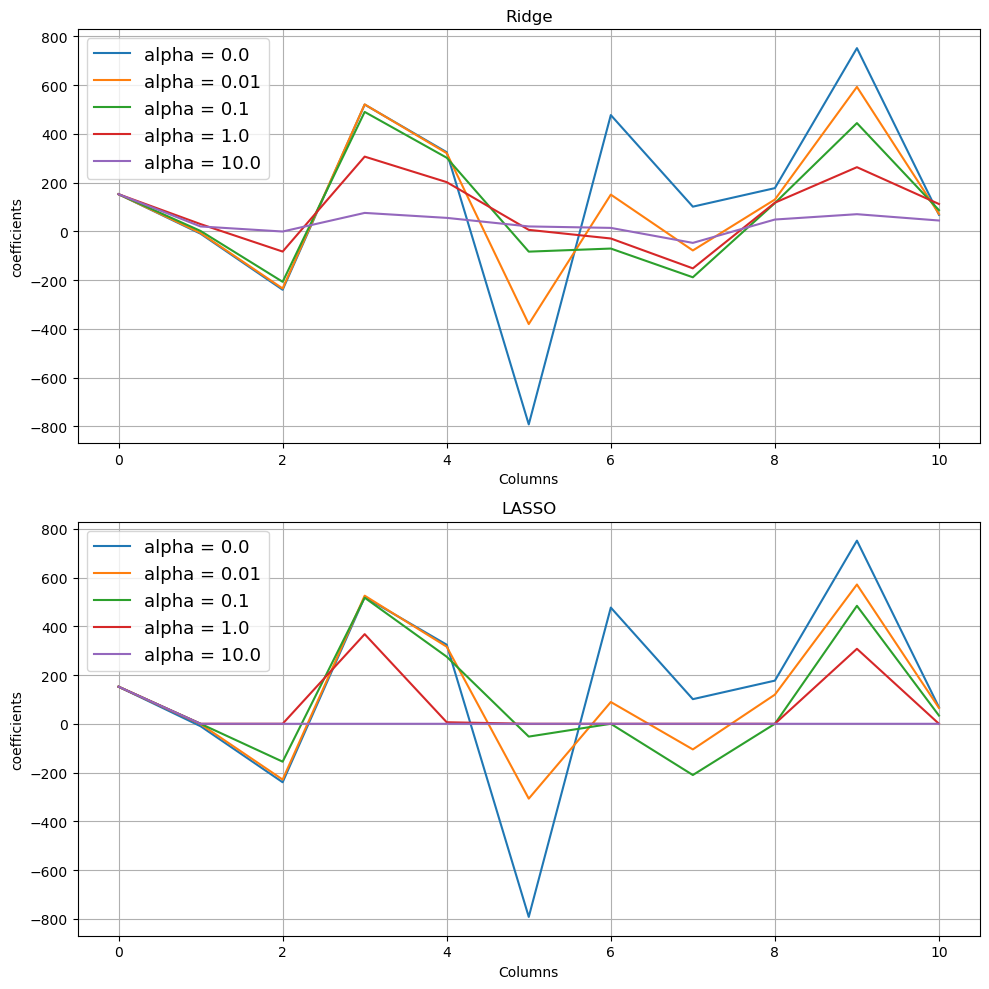

In [5]:
# 하이퍼파라미터 별 추정 가중치의 크기 감소 비교
result_Ridge = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, random_state=123)
    model_ridge.fit(X, Y)
    result_coef = pd.DataFrame(np.hstack([model_ridge.intercept_, model_ridge.coef_]), 
                               columns=['alpha = {}'.format(alpha_weight)])
    result_Ridge = pd.concat([result_Ridge, result_coef], axis=1)
   
result_LASSO = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, random_state=123)
    model_lasso.fit(X, Y)
    result_coef = pd.DataFrame(np.hstack([model_lasso.intercept_, model_lasso.coef_]), 
                               columns=['alpha = {}'.format(alpha_weight)])
    result_LASSO = pd.concat([result_LASSO, result_coef], axis=1)
    
result_Ridge.plot(figsize=(10,10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.grid()
result_LASSO.plot(legend=True, ax=plt.subplot(212))
plt.title('LASSO')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.tight_layout()
plt.grid()
plt.show()

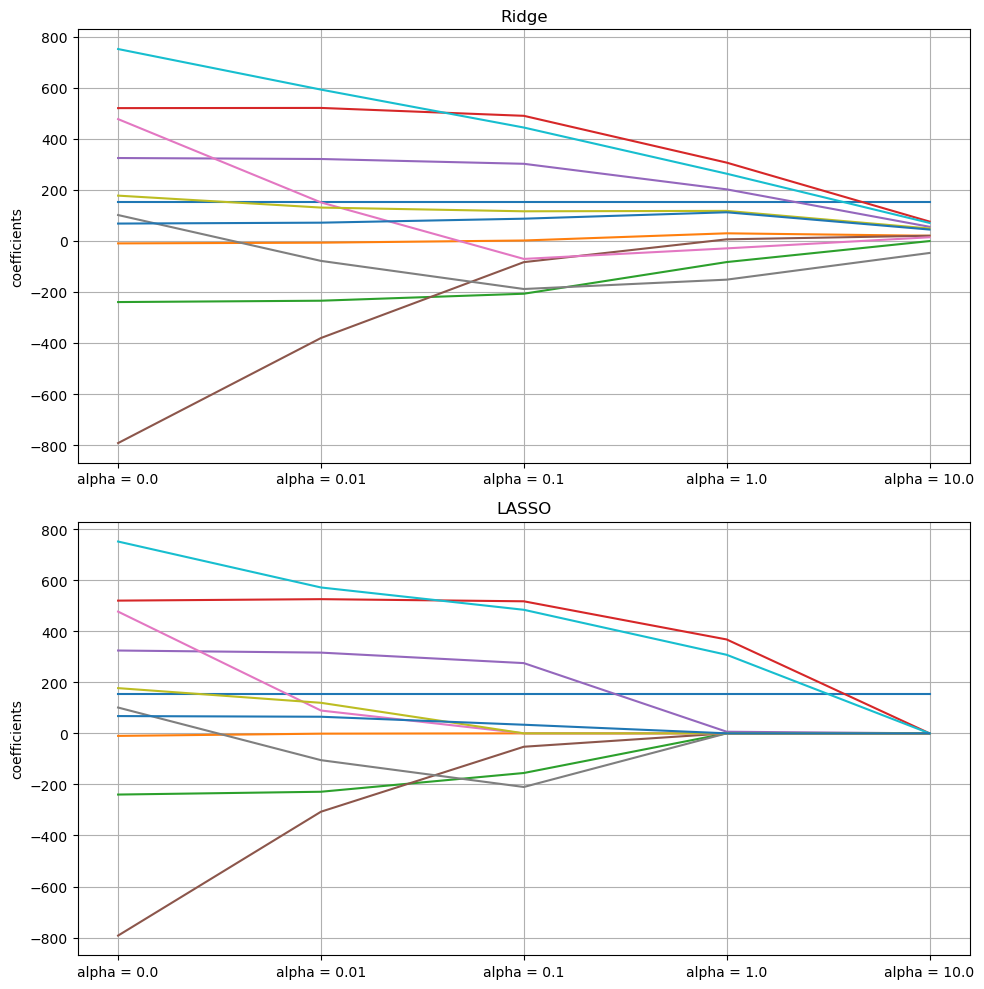

In [6]:
# 하이퍼파라미터 별 추정 가중치의 감소 속도 비교
result_Ridge.T.plot(figsize=(10,10), legend=False, ax=plt.subplot(211))
plt.title('Ridge')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.grid()
result_LASSO.T.plot(legend=False, ax=plt.subplot(212))
plt.title('LASSO')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.tight_layout()
plt.grid()
plt.show()

In [7]:
# 하이퍼파라미터 세팅
# 모델 생성
# 데이터 학습
# 추정 가중치 확인
model_en = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, random_state=123)
model_en.fit(X, Y)
coef_en = pd.DataFrame(np.hstack([model_en.intercept_, model_en.coef_]), 
                       columns=['Elastic Net'])
coef_en

,Elastic Net
0,152.133484
1,23.622324
2,-2.959355
3,133.398019
4,92.595277
5,21.034549
6,8.266501
7,-75.966633
8,73.503804
9,120.612800


In [8]:
# 계수 결과 비교
pd.concat([coef_ridge, coef_lasso, coef_en], axis=1)

,Ridge,Lasso,Elastic Net
0,152.133484,152.133484,152.133484
1,20.138007,0.000000,23.622324
2,-131.241495,-0.000000,-2.959355
3,383.483704,471.041874,133.398019
4,244.835070,136.504084,92.595277
5,-15.186741,-0.000000,21.034549
6,-58.344136,-0.000000,8.266501
7,-174.842371,-58.319017,-75.966633
8,121.984950,0.000000,73.503804
9,328.498757,408.022685,120.612800


## 회귀문제 목적별 알고리즘 종류

- **변수 세팅에 따른 분류:**

<center><img src='Image/Expert/Regression-Algorithms-Tree1.png' width='900'></center> 

---

- **해결 문제에 따른 분류:**

<center><img src='Image/Expert/Regression-Algorithms-Tree2.png' width='900'></center> 

# **지도학습(Supervised) 알고리즘:** 분류분석

---

<center><img src='Image/Expert/Advanced_Algorithms_SupervisedClassification.png' width='900'></center>

<!-- (https://thaddeus-segura.com/intro_to_ml/) -->


## 정규화 방법론(Regularized Method)

**1) Linear Regression:** `MSE`를 비용함수로 사용

<center>
$\hat{w} = \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2\Biggr]$
</center>

- **Elastic Net:**  

\begin{align*}
\hat{w} &= \underset{w}{\arg\min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k w_i x_{ij}\Bigr)^2 + \lambda_1 \displaystyle \sum_{i=0}^k \left|w_i \right| + \lambda_2 \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\ &where~\lambda_1~and~\lambda_2~are~hyper~parameters(given~by~human)
\end{align*}

---

**2) Logistic Regression:** `Cross Entropy`를 비용함수로 사용

\begin{align*}
\hat{w} &= \underset{w}{\arg\min} \Biggl[\sum_{i=1}^{m} \left[  -\hat{Y}_{i} log (Pr(\hat{Y}_{i})) - (1-\hat{Y}_{i}) log (1-Pr(\hat{Y}_{i})) \right] \Biggr] \\
\end{align*}

- **[Regularized Logistic Regression:](https://pythonmana.com/2022/01/202201070733440026.html)**

\begin{align*}
\hat{w} &= \underset{w}{\arg\min} \Biggl[\sum_{i=1}^{m} \left[  -\hat{Y}_{i} log (Pr(\hat{Y}_{i})) - (1-\hat{Y}_{i}) log (1-Pr(\hat{Y}_{i})) \right] + \frac{\lambda_1}{2} \displaystyle \sum_{i=0}^k \left|w_i \right| + \frac{\lambda_2}{2} \displaystyle \sum_{i=0}^k w_i^2\Biggr] \\
\end{align*}

<center><img src='Image/Expert/Regularization_Logistic.png' width='400'></center> 

## K 최근접 이웃(K-Nearest Neighbors, KNN)

**1) 알고리즘 함수세팅:** `직관적`으로 분류하는 가장 간단한 `알고리즘`

<center><img src='Image/Expert/Advanced_KNN_Estimation.jpg' width='600'>(https://www.analyticsvidhya.com/blog/2021/05/20-questions-to-test-your-skills-on-k-nearest-neighbour/)</center>

- `학습(Learing)`으로 볼만한 과정이 없고 `샘플(Observation)들의 위치`만 기억
- 별도 모델링 작업이 없다라는 뜻으로 `게으른 알고리즘(Lazy Algorithm)`이라고도 함

> - 데이터로부터 모델을 생성해서 임무를 수행하는 대부분의 머신러닝 모델기반 학습과 대비

- `새로운 데이터`에 대해, 기존 데이터 중 `가장 가까운 K개 이웃 정보` 중 다수인 것으로 `예측`
- `Regression, Classification, Clustering, Associate` 분석 모두에 사용가능하며, `분류`의 대표적 기법

> - 여기서 `K`는 Y 레이블/카테고리의 수가 아니라, 탐색할 `주변 데이터 샘플 수`로 통상 $\sqrt{전체샘플수}$ 보다 작은 값으로 정함

---

**2) K에 따른 결과 차이:**

- `K`의 갯수에 따라 `결과는 다양`하게 나타남

<center><img src='Image/Expert/Advanced_KNN_Results_byK.png' width='600'>(https://hal.archives-ouvertes.fr/hal-01657491/document)</center>

- `K`가 작을 경우 너무 지역적인 특성만 지나치게 많이 반영되어 `과대적합`
- `K`가 매우 클 경우 여러 레이블이 포함되어 특성들을 잘 반영하지 못하고 지나치게 정규화되어 `과소적합`

<center><img src='Image/Expert/Advanced_KNN_OverUnder.png' width='600'>(https://github.com/hyunblee/ISLR-with-Python/blob/master/Ch4-Classification/KNN-Regression_Classifcation_Evaluation.pdf)</center>

---

**3) 이슈 및 정리:** `빅데이터` 기반 머신러닝에서는 많이 사용되지 않는 `전통적 알고리즘`

- **첫번째 하이퍼파리미터:** `K`의 갯수는 몇개가 `최적`
- **두번째 하이퍼파라미터:** `거리 계산`을 `어떤 비용함수`로 사용하는 것이 좋을까?

> - `Clustering`과 마찬가지로 `다양한 거리계산` 활용 가능하며 `변수들`의 `정규화`도 필수

- `독립변수`들의 위치에만 의존하는데, 위치말고 `변수들의 중요도`는 다를 수 있지 않을까?
- `독립변수`들 중 `카테고리형`은 어떻게 거리 계산?

> | **장점** 	| **단점** 	|
|:---:	|:---:	|
| 알고리즘이 `간단하고 구현이 쉬움` 	| 학습과정이 없어서 `데이터 양이 많으면 계산량이 많아져서 분류 속도 느림` 	|
| 수치기반 데이터분류에 `성능이 좋음` 	| 변수나 값들의 `중요도가 고려되지 않고 카테고리형 데이터분류 어려움` 	|

---

**4) 사용방법:**

> ```python
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
> ```

> ```python
> # 학습 및 예측
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, Y_train)
Y_trpred = model_knn.predict(X_train)
Y_tepred = model_knn.predict(X_test)
> ```

## 서포트 벡터 머신(Support Vector Machine, SVM)

**1) 알고리즘 함수세팅:** `서로 다른 집단`간 `상대적인 거리`를 `최대화`하는 기준면을 파악하여 `분류`

- `Regression, Classification` 분석에 사용가능하며, `분류`의 대표적 기법
- 이론 기반 알고리즘으로 `결과해석 용이`하고 `스몰데이터`에도 효과적
- `빅데이터`의 경우 과적합 경우가 적으며 `인공신경망` 수준의 성능
- `Separating Hyperplane`을 기준으로 클래스/카테고리/레이블을 분류하는 방식

> - **Separating Hyperplane:** 데이터 클래스들 사이의 `거리/차이(Margin)`를 최대화하는 `경계(Plane)`를 말하며 `결정경계(Decision Boundary)`라고도 함
> - **Support Vector:** Decision Boundary 기준으로 `가장 가까운 샘플/벡터`
>
> <center><img src='Image/Expert/Advanced_SVM_Words.png' width='500'>(https://techblog-history-younghunjo1.tistory.com/78)</center>
>
> - `Support Vector`만 찾아내여 결정경계가 정의되기 때문에 `다른 데이터 샘플 무시할 수 있어서 속도가 빠름`

- **초평면(Hyperplane):** 

> - `2차원`에선 결정경계가 `1차원 직선`이고, `3차원`에선 결정경계가 `2차원 평면`이라고 하면, 차원이 증가될 경우의 결정경계 표현을 `초평면`이라고 총칭
>
> <center><img src='Image/Expert/Advanced_SVM_HyperplaneComparison.png' width='600'>(https://hleecaster.com/ml-svm-concept/)</center>

---

**2) 거리/차이(Margin)에 따른 결과 차이:** 결정경계와 가장 가까운 샘플 사이 거리를 `마진(Margin)`

- **하드마진(Hard Margin):** `아웃라이어를 허용하지 않도록` 엄격하게 모델링 하는 것으로 `마진이 작아지고` 모든 데이터를 놓치지 않고 학습하려는 `과대적합` 가능성
- **소프트마진(Soft Margin):** `아웃라이어를 어느정도 허용`하도록 다소 너그럽게 모델링 하는 것으로 `마진이 커지고` 대충 데이터를 학습하는 `과소적합` 가능

<center><img src='Image/Expert/Advanced_SVM_MaxMargin.png' width='600'>(https://hleecaster.com/ml-svm-concept/)</center>

- `적절한 마진`으로 `분류 성능`도 높이고 `Outlier`에 영향을 적게 받는 `Robust`한 모델링 필요
- 마진은 `최대화`하면서 오분류(아웃라이어)는 `최소화` 하기 위한 Trade-off를 조정하기 위해 `비용함수에 규제파라미터(Regularization Parameter) 또는 패널티(Penalty) 부여`

---

**3) 정리 및 비선형/다중 분류:**

- `결정 경계(Decision Boundary)`를 정의하고, 분류되지 않은 점을 해당 결정 경계와 `비교해서 분류`

- 최적화를 위해 `여러개의 조합`을 테스트 하기에 상대적으로 `학습속도는 느릴 수 있음`

- **Kernel SVM:** 기본적으론 `선형 직선` 기준으로 분류하지만, `비선형 방식`으로도 SVM 사용 가능

> - **커널(Kernel):** 원데이터를 `더 높은 차원으로 변환`하는 알고리즘
> - 선형 분리가 어려운 데이터에는 `비선형 접근`인 `커널(Kernel)` 사용
> - `Kernel SVM`이 등장하게 되었는데, 차원변환 방식에 따라 다양한 `Kernel` 존재
>
> <center><img src='Image/Expert/Advanced_SVM_Hyperplane.png' width='600'>(https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/)</center>

- **Structural SVM:** `레이블이 여러개`인 경우 사용하는 `분류` 알고리즘

---

**4) 사용방법:**

> ```python
from sklearn.svm import SVC, SVR
> ```

> ```python
> # 학습 및 예측
model_svm = SVC(kernel='linear', random_state=123)
model_svm.fit(X_train, Y_train)
Y_trpred = model_svm.predict(X_train)
Y_tepred = model_svm.predict(X_test)
> ```

## 나이브 베이지안(Naive Bayesian, NB)

**0) 베이즈 정리(Bayes' Theorem):** `NB` 알고리즘 이해를 위한 `필수 개념`

- `새로운 사건의 확률`을 계산하기 전에 `이미 일어난 사건을 고려`하는 방식으로 통계의 근간
- `인공지능` 알고리즘을 창시한 영국의 수학자 `앨런 튜링(Alan Turing)`도 `베이즈 정리`를 활용해 2차 세계대전 독일의 `에니그마(Enigma) 암호 풀어냄`
- `인공지능`의 층을 쌓아올려는 아이디어의 `기초가 됨`
- `머신러닝, 통계적 모델링, A/B 테스트, 로보틱스(로봇공학) 등`에서 널리 사용

<center><img src='Image/Expert/Advanced_Bayesian_Movie.jpg' width='500'></center>

---

> **"6개의 총알이 들어갈수 있는 총에 2개의 총알이 들어있는데, 방아쇠를 당겼을 때 총알이 발사될 확률은?"**
>
> | **방식** | **방향** |
|:---:|:---|
| 독립확률 추정 | 모든 사건은 `독립`이어서 서로 영향을 주지 않고 `여러이벤트`는 `독립 곱`으로 확률 계산하는 것으로 `빈도주의(Frequent)`라고도 함 |
| 비독립확률 추정 | 모든 사건은 `비독립`이라 서로 영향을 주고 `여러이벤트`는 `베이지안 곱`으로 확률 계산하는 것으로 `베이지안(Bayesian)`이라고도 함 |
>
> **(1) 독립확률 추정:** `실제 일어난 사건의 빈도확률`로 예측 데이터가 `발생 가능성`을 알아내는 것
>
> - 동전을 10번던져서 4개가 앞면이면 4/10, 100번던져서 45개가 앞면이면 45/100처럼 `빈도로 확률 추정`
>
> - 여러개의 `독립사건`이 반복되더라도 `곱하기`로 확률 계산
>
> $$
\begin{align}
P(A \cap B) &= P(A)P(B) \\
P(총알발사 \cap 방아쇠당김) &= P(총알발사)P(방아쇠당김) \\
&= \frac{1}{3} \times \frac{1}{2} \\
&= \frac{1}{6}
\end{align}
$$
>
> **(2) 비독립확률 추정:** 빈도확률 계산이 어렵거나 현실적으로 `서로 영향을 주는 비독립 사건` 가정으로 `발생 가능성`을 알아내는 것
> - 빈도확률은 데이터가 존재하거나 시도 가능한 경우에만 사용가능하기에 `데이터가 충분하지 않거나 시간 또는 비용이 너무 큰 사건들`은 불가
>
> - 사람의 생명과 같은 귀중한 것이거나, 일어나지 않아야 할 사건 확률, 너무 드물어서 이전 데이터마저 존재하지 않는 사건 등, `관찰 비용이 커다란 사건에 대한 확률을 구하는 방식`을 연구하며 개발된 확률 기법
> - `화산 폭발 확률`을 빈도확률로 계산하긴 어렵고 서로 영향을 주는 `비독립 사건`들이 굉장히 많기에, `관련있는 여러 확률`을 사용해서 `새롭게 일어날 사건확률 추정`하고 `유연하고 현실적인 대부분의 사건`의 확률 계산에 활용
>
> $$
\begin{align}
P(A|B) &= \dfrac{P(A \cap B)}{P(B)} \\
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
\text{사건B 발생후 갱신된 사건A 확률} &= \dfrac{\text{사건A 발생시 사건B 확률} \times \text{사건B 발생전 사건A 확률}}{\text{실제 사건B 확률}} \\
\text{방아쇠 당겼을 때 총알 발사 확률} &= \dfrac{\text{총알이 발사되었을 때 방아쇠가 당겨졌을 확률} \times \text{총알 발사 확률}}{\text{방아쇠 당겨질 확률}} \\
\text{방아쇠 당겼을 때 총알 발사 확률} &= \dfrac{1 \times 1/3}{1/2} \\
&= \frac{2}{3}
\end{align}
$$

---

- **예시1:** 평소 `60%` 확률로 거짓말하는 사람이 있다. `90%` 정확도를 가진 거짓말 탐지기로 이 사람이 하는 말이 거짓말일 확률은 얼마나 될까?

> **(1) 빈도기준 추정(Frequent):** `이어진 여러사건`의 확률을 단순히 `곱해서 추정`
> - $0.6 \times 0.9 = 0.54(54\%)$
>
> **(2) 베이지안 추정(Bayesian):** 거짓말 하는 것($A$), 거짓말 탐지기가 거짓말이라고 하는 것($B$)
>
> - $P(A|B)$: `목적` - 거짓말 탐지기로 이 사람 말이 거짓말이 확률
>
> $$
\begin{align}
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
\end{align}
$$
> - $P(B)$: 거짓말 탐지기로 거짓말로 판정될 확률
>> - `거짓말인데 거짓이라고 판정` + `거짓말 아닌데 거짓이라고 판정`
>> - $0.6 \times 0.9 + 0.4 \times 0.1 = 0.58(58\%)$
> - $P(B|A)$: 거짓말을 했을때 거짓말 탐지기가 거짓이라고 할 확률
>> - `가능도(Likelihood)`라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문
>> - $0.9(90\%)$
> - $P(A)$: `사전확률`, 거짓말 할 확률 - $0.6(60\%)$
> 
> - $P(A|B)$: `사후확률`, $\frac{0.9 \times 0.6}{0.58} = 0.93(93\%)$
> 
> <span style="color:red">$\Rightarrow$ 베이즈 정리의 핵심은, 관찰을 통해 `새로운 정보`가 추가되면 `확률이 업데이트`!</span>

---

- **예시2:** 일반 여성의 유방암 발병률은 `0.1%`, 유방암 검사는 실제 유방암 환자에겐 `99%` 확률로 `양성`을 제시하고, 건강한 사람에겐 `2%` 확률로 `양성`을 제시하는 오류를 보인다. 만약 유방암 검사 결과 양성이었다면 실제 유방암에 걸렸을 확률은 얼마나 될까?

> **(1) 빈도기준 추정(Frequent):** `이어진 여러사건`의 확률을 단순히 `곱해서 추정`
> - $0.99 \times 0.001 = 0.00099(0.099\%)$
>
> **(2) 베이지안 추정(Bayesian):** 유방암 걸리는 것($A$), 유방암 검사결과 양성판정 나오는 것($B$)
>
> - $P(A|B)$: `목적` - 유방암 검사결과 양성시 실제 유방암 걸릴 확률
>
> $$
\begin{align}
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
\end{align}
$$
> - $P(B)$: 유방암 검사결과 양성판정이 나올 확률
>> - `실제 유방암 환자인데 양성이라고 판정` + `건강한 사람인데 양성이라고 판정`
>> - $0.001 \times 0.99 + 0.999 \times 0.02 = 0.020079(2.0079\%)$
> - $P(B|A)$: 실제 유방암 환자인데 양성이라고 판정될 확률
>> - `가능도(Likelihood)`라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문
>> - $0.99(99\%)$
> - $P(A)$: `사전확률`, 유방암 발병률 - $0.001(0.1\%)$
> 
> - $P(A|B)$: `사후확률`, $\frac{0.99 \times 0.001}{0.020079} = 0.049(4.9\%)$

---

- **예시3:** 만약 한번 더 유방암 검사 결과 양성이었다면 실제 유방암에 걸렸을 확률은 얼마나 될까?

> **(1) 빈도기준 추정(Frequent):** `이어진 여러사건`의 확률을 단순히 `곱해서 추정`
> - $0.99 \times 0.99 \times 0.001 = 0.0009801(0.09801\%)$
>
> **(2) 베이지안 추정(Bayesian):** 유방암 걸리는 것($A$), 양성판정 받고 한번 더 유방암 검사결과 양성판정 나오는 것($B$)
>
> - $P(A|B)$: `목적` - 한번 더 유방암 검사결과 양성시 실제 유방암 걸릴 확률
>
> $$
\begin{align}
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
\end{align}
$$
> - $P(B)$: 유방암 검사결과 양성판정이 나올 확률
>> - `유방암 검사결과 양성이고 실제 유방암 환자인데 양성이라고 판정` + `유방암 검사결과 양성이고 건강한 사람인데 양성이라고 판정`
>> - $0.049 \times 0.99 + 0.951 \times 0.02 = 0.06753(6.753\%)$
> - $P(B|A)$: 실제 유방암 환자인데 양성이라고 판정될 확률
>> - `가능도(Likelihood)`라고 부르는 이유는 보통 알려진 또는 이미 가진 정보라 가정하기 때문
>> - $0.99(99\%)$
> - $P(A)$: `사전확률`, 유방암 검사결과 양성시 실제 유방암 걸릴 확률 - $0.049(4.9\%)$
> 
> - $P(A|B)$: `사후확률`, $\frac{0.99 \times 0.049}{0.06753} = 0.718(71.8\%)$
> 
> <span style="color:red">$\Rightarrow$ 베이즈 정리의 핵심은, 관찰을 통해 `새로운 정보`가 추가되면 `확률이 업데이트`!</span>

---

- **정리:** `사건B`가 발생했다는 전제 하에서 `사건A`가 발생할 `조건부확률(Conditional Probability)`

> $$
\begin{align}
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B \cap A) + P(B \cap A^c)} \\
사후확률 &= \dfrac{가능도 \times 사전확률}{증거} \\
\end{align}
$$
>
> - **사전확률(Prior):** `사건B`가 발생하기 `전`에 가지고 있던 `사건A`의 발생 확률 $P(A)$
> - **사후확률(Posterior):** `사건B`가 발생하면, 이를 반영하여 `사건A`의 확률은 $P(A|B)$
> - **가능도(Likelihood):** `사건A`가 발생했을 때의 `사건B`의 확률 $P(B|A)$
> - **증거(Evidence, Normalizing Constant):** `사건B`가 `실제` 발생한 확률로, `가능도`를 `실제 가능도`로 조정해주는 역할 $P(B)$
>
> $$
\begin{align}
사후확률 &= \dfrac{가능도 \times 사전확률}{증거} \\
\text{사건B 발생후 갱신된 사건A 확률} &= \dfrac{\text{사건A 발생시 사건B 확률} \times \text{사건B 발생전 사건A 확률}}{\text{실제 사건B 확률}} \\
\end{align}
$$
>
> - `사건B`가 발생함으로써, `사건A` 확률이 어떻게 변하는지 `표현`
> - `새로운 정보`가 등장시, `기존의 정보와 추론`이 어떻게 영향을 미치는지 `표현`

---

**1) 알고리즘 함수세팅:** `Bayes 이론`에 기반한 확률적 `분류` 알고리즘

$$
\begin{align}
P(A|B) &= \dfrac{P(B|A)P(A)}{P(B)} \\
\end{align}
$$

- `B상황`이 생겼을 때 `A상황`의 확률 추정
- 만약에 `B = 변수(Feature)` & `A = 레이블(Label)`이라고 하면, 데이터로 레이블 확률 추정하는 `분류기`로 변신

<center><img src='Image/Expert/Advanced_NB_Soccer.webp' width='700'>(https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)</center>

$$
\begin{align}
P(Yes|Overcast) &= \dfrac{P(Overcast|Yes)P(Yes)}{P(Overcast)} \\
&= \dfrac{0.44 \times 0.64}{0.29} = 0.98(98\%) \\
\end{align}
$$

$$
\begin{align}
P(No|Overcast) &= \dfrac{P(Overcast|No)P(No)}{P(Overcast)} \\
&= \dfrac{0 \times 0.36}{0.29} = 0(0\%) \\
\end{align}
$$

<span style="color:red">$\Rightarrow$ `두 확률`을 `비교`한 후, `확률 높은 레이블`로 추론하므로 내일 날씨가 Overcast면 축구 할거라 `예측`</span>


- **장단점:** 

| **장점** | **단점** |
|:---|:---|
| 변수들이 `독립`이라는 큰 가정 존재하지만, <br> 가정을 만족할 경우 다른   알고리즘보다 `적은 데이터로도 좋은 성능` | `Logistic Regression` 보다 `학습 속도 빠름` 그러나 `일반화 성능 부족` |
| 각 변수의 `특성`을 개별로 취급하여 학습하고 <br> 각 특성에서 `클래스별 확률`를 추합하기에 `정확하고 믿을만함` | Train에는 있으나 `Test에 없는 클래스`에선 확률이 0이라 `예측 불가능` <br> - **Laplace Smoothing:** Test에 `신규 클래스` 생성시 예측 확률 생성을 위한 방식 |
| `빅데이터`에도 컴퓨팅이 적어 `빠른 분류` 가능하며 <br> `질병 진단, 스팸 분류, 감성 분석, 추천 시스템` 등에 많이 사용 | `현업`에선 변수들이 독립적인 경우가 적어 `사용에 어려움` |
| 레이블이 여러개인 `Multiple Class`에도 베이즈 정리 기반으로 쉽게 `활용 가능` |  |

<center><img src='Image/Expert/Advanced_NB_SpamHam.png' width='700'>(https://www.atoti.io/articles/how-to-solve-the-zero-frequency-problem-in-naive-bayes/)</center>

- **종류:**

> - **Gausian NB:** `정규분포`를 따르는 `연속형` 데이터에서 사용하는 NB 분류기로 `고차원 데이터셋`에 주로 사용
> - **Bernoulli NB:** `베르누이분포`를 따르는 `이진(Binary)` 데이터에서 사용하는 NB 분류기로 모델 `복잡도 조절 매개변수` $\alpha$ 존재
> - **Multinomial NB:** `다항분포`의 특성을 가지는 데이터에서 사용하는 NB 분류기로 모델 `복잡도 조절 매개변수` $\alpha$ 존재

---

**2) 사용방법:**

> ```python
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
> ```

> ```python
> # 학습 및 예측
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
Y_trpred = model_gnb.predict(X_train)
Y_tepred = model_gnb.predict(X_test)
> ```

# **문제 별 알고리즘 결과비교**

<center><img src='Image/Expert/Advanced_Algorithms.webp' width='900'></center>

## `Library` 호출

In [9]:
!pip install mlxtend --user

In [10]:
# 필요 라이브러리 호출
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [11]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

## 회귀 문제

### `Data Preprocessing`

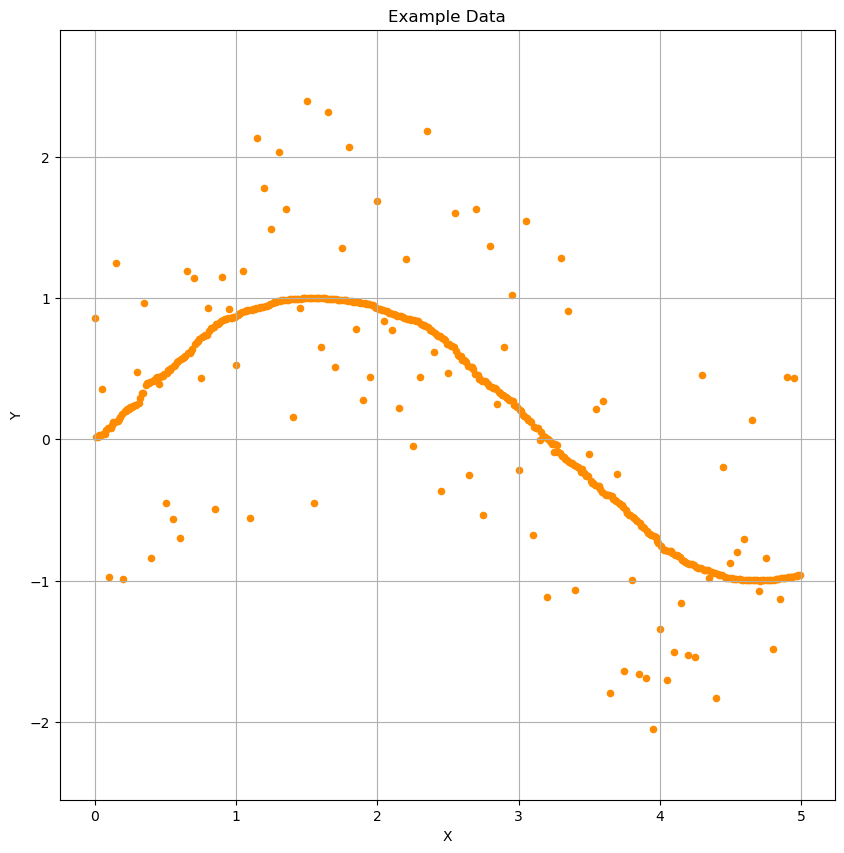

In [12]:
# 예제 데이터 로딩
rng = np.random.RandomState(123)
X_train = np.sort(5 * rng.rand(500, 1), axis=0)
Y_train = np.sin(X_train).ravel()                        # sin함수의 예측을 목표로한다
X_test = np.arange(0.0, 5.0, 5/X_train.shape[0])[:, np.newaxis]
Y_test = Y_train.copy()
Y_test[::5] = Y_test[::5] + 3 * (0.5 - rng.rand(100))

# 예제 데이터 시각화
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.title('Example Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.show()

### `Regression Modeling`

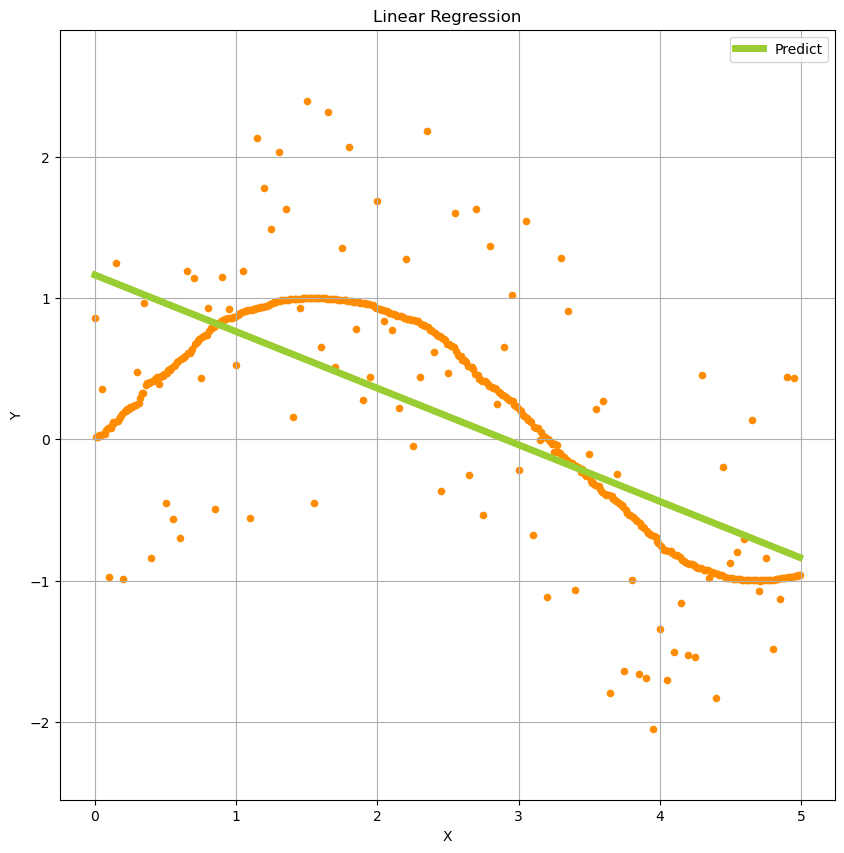

,MAE,MSE,MAPE
Train,0.361330,0.182094,7.257948
Test,0.446577,0.332987,1.623856


In [13]:
# 모델링: Linear Regression
## 학습
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)
## 예측
Y_trpred = model_reg.predict(X_train)
Y_tepred = model_reg.predict(X_test)
## 학습결과
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_reg = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_reg

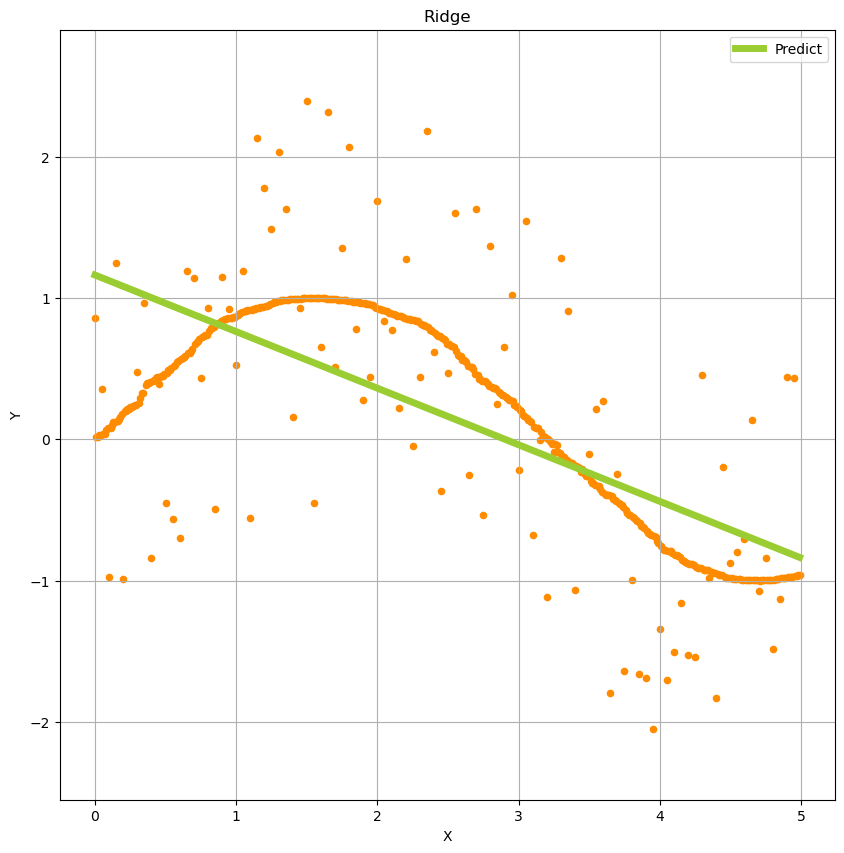

,MAE,MSE,MAPE
Train,0.361338,0.182094,7.257658
Test,0.446583,0.332986,1.623795


In [14]:
# 모델링: Ridge
## 학습
alpha_weight = 0.05
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_ridge.fit(X_train, Y_train)
## 예측
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
## 학습결과
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Ridge')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_ridge = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_ridge

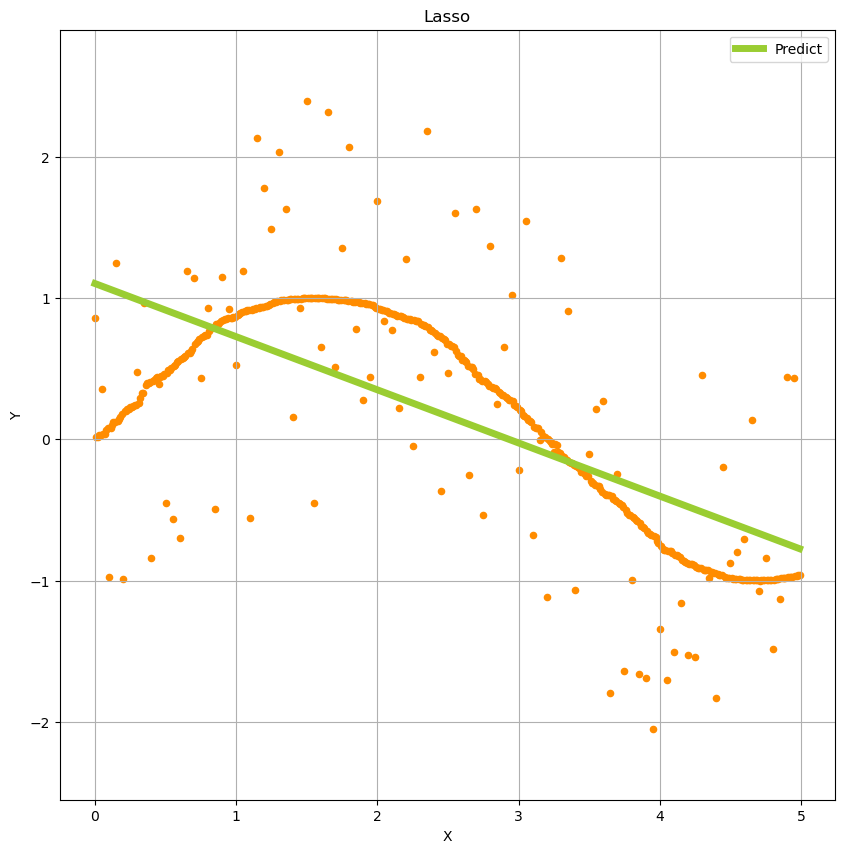

,MAE,MSE,MAPE
Train,0.371742,0.183316,6.896714
Test,0.454568,0.333242,1.548712


In [15]:
# 모델링: Lasso
## 학습
alpha_weight = 0.05
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, random_state=123)
model_lasso.fit(X_train, Y_train)
## 예측
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
## 학습결과
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Lasso')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_lasso = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_lasso

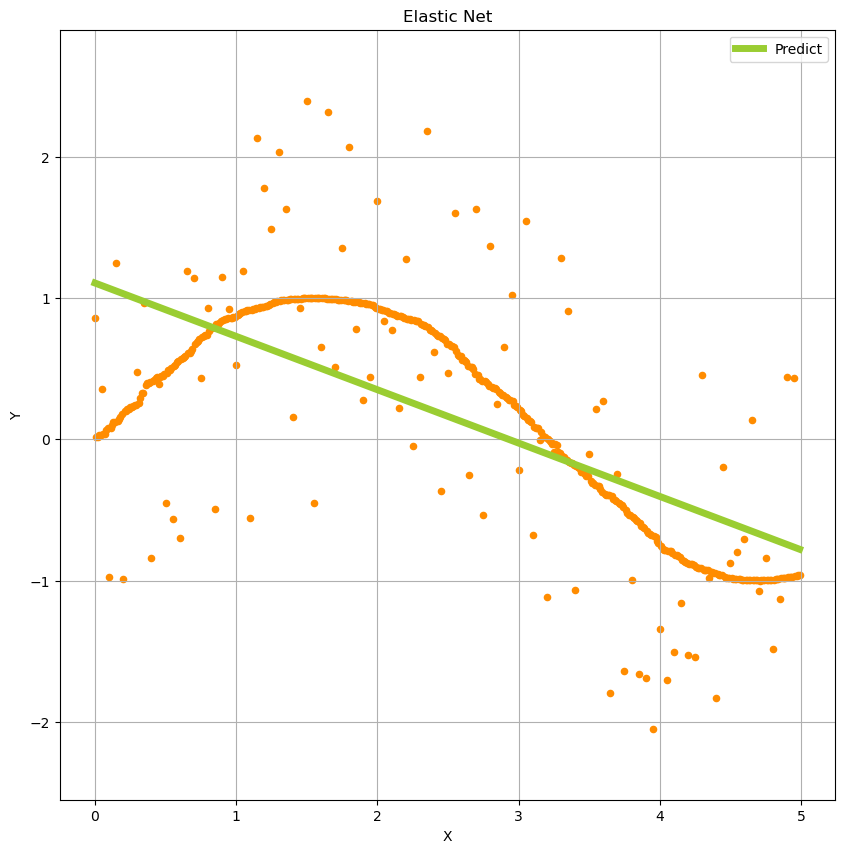

,MAE,MSE,MAPE
Train,0.371084,0.183169,6.919147
Test,0.454042,0.333153,1.553269


In [16]:
# 모델링: Elastic Net
## 학습
model_en = ElasticNet(alpha=0.05, l1_ratio=0.9, fit_intercept=True, random_state=123)
model_en.fit(X_train, Y_train)
## 예측
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
## 학습결과
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_tepred, color='yellowgreen', linewidth=5, label='Predict')
plt.title('Elastic Net')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

# 성능검증
eval_en = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
eval_en

,MAE,MSE,MAPE
Linear,0.446577,0.332987,1.623856
Ridge,0.446583,0.332986,1.623795
Lasso,0.454568,0.333242,1.548712
Elastic Net,0.454042,0.333153,1.553269


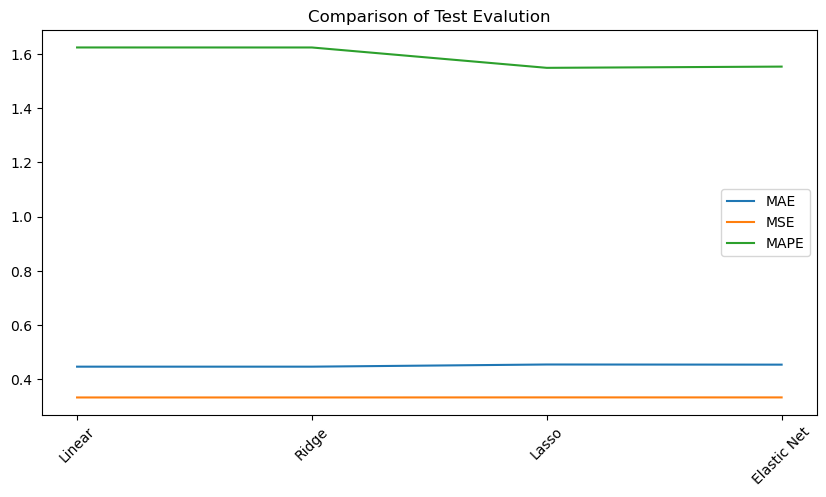

In [17]:
# 결과비교
labels = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
models = [eval_reg, eval_ridge, eval_lasso, eval_en]
result_regression = pd.DataFrame()
for result in models:
    result_regression = pd.concat([result_regression, result.iloc[1:,:]], axis=0)
result_regression.index = labels
display(result_regression)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_regression)
plt.title('Comparison of Test Evalution')
plt.xticks(rotation=45)
plt.legend(['MAE', 'MSE', 'MAPE'])
plt.show()

## 분류 문제

### `Data Preprocessing`

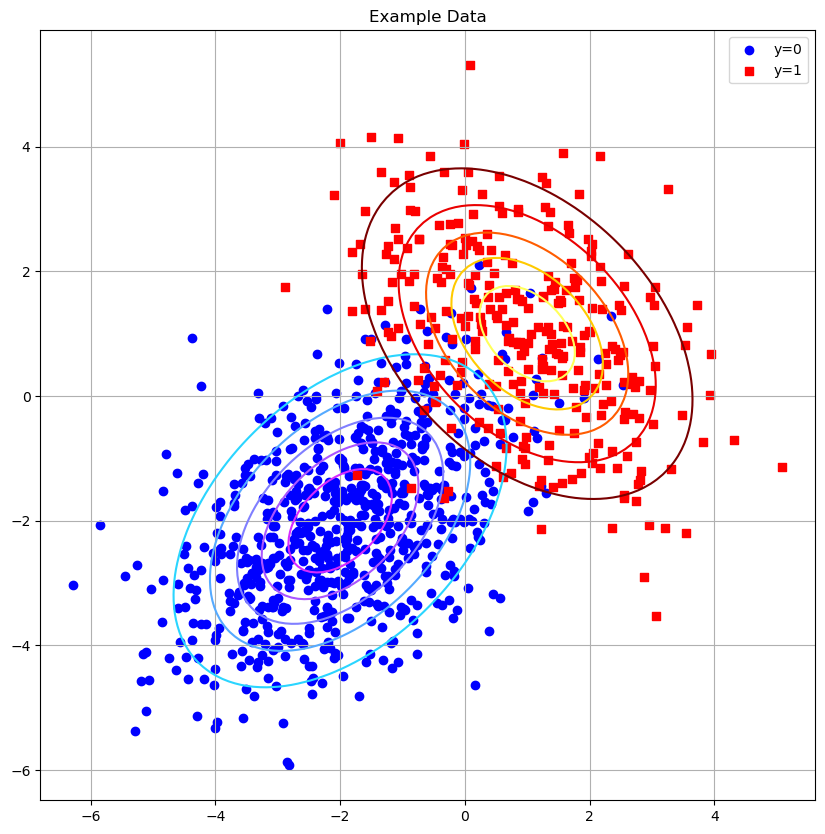

In [18]:
# 예제 데이터 로딩
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[2, 0.9], [0.9, 2]], seed=123)
rv1 = sp.stats.multivariate_normal([1, 1], [[2, -0.8], [-0.8, 2]], seed=123)
X0 = rv0.rvs(700)
X1 = rv1.rvs(300)
X = np.vstack([X0, X1])
Y = np.hstack([np.zeros(700), np.ones(300)])

# 예제 데이터 시각화
plt.figure(figsize=(10,10))
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title('Example Data')
plt.axis("equal")
plt.grid()
plt.show()

In [19]:
# 데이터 분리 및 스케일링
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### `Classification Modeling`

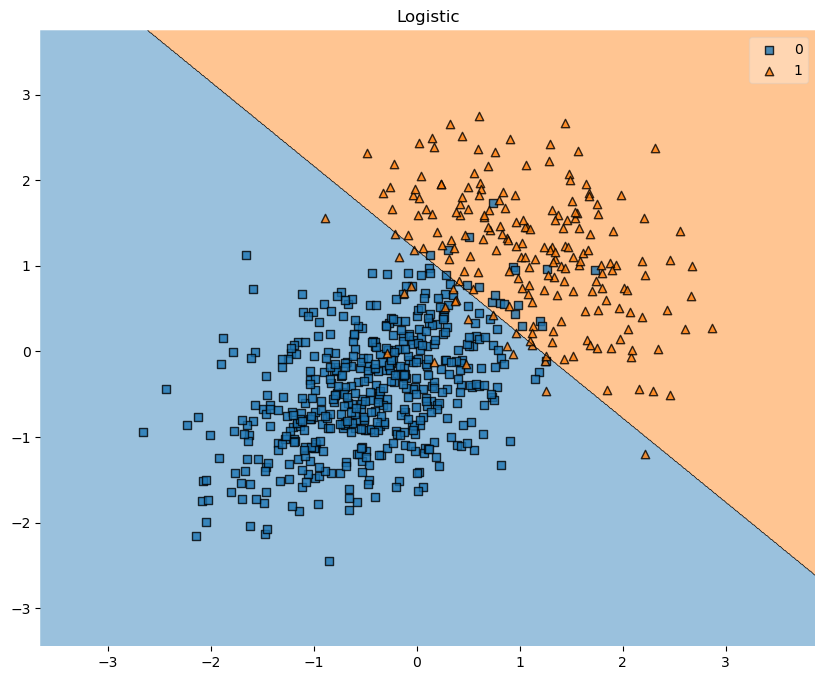

,Accuracy,AUC
Train,0.940000,0.922738
Test,0.916667,0.901804


In [20]:
# 모델링: Logistic
## 학습
model_logitreg = LogisticRegression()
model_logitreg.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_logitreg)
plt.title('Logistic')
plt.show()
## 예측
Y_trpred = model_logitreg.predict(X_train)
Y_tepred = model_logitreg.predict(X_test)

# 성능검증
eval_logitreg = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_logitreg

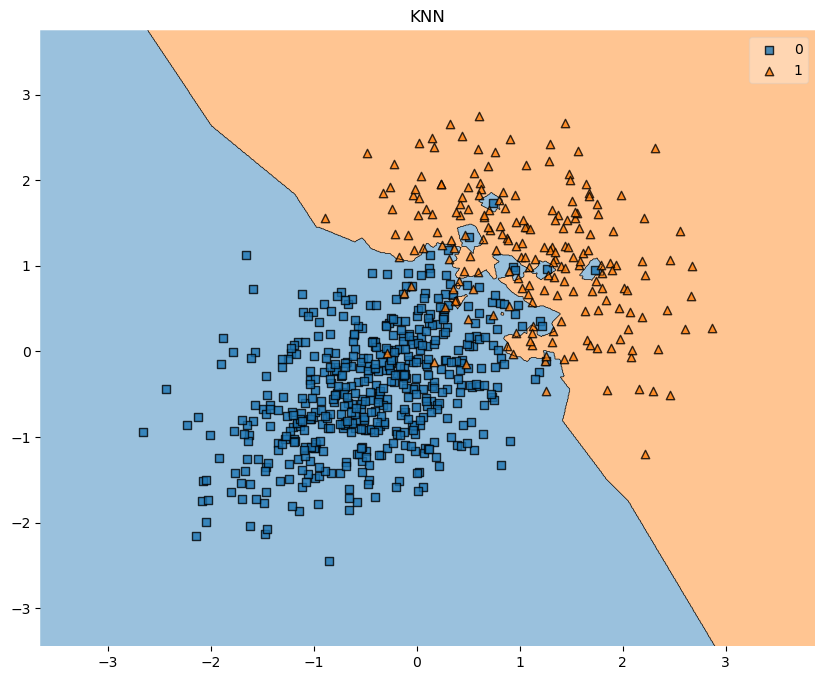

,Accuracy,AUC
Train,0.958571,0.926396
Test,0.913333,0.885368


In [21]:
# 모델링: KNN
## 학습
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_knn)
plt.title('KNN')
plt.show()
## 예측
Y_trpred = model_knn.predict(X_train)
Y_tepred = model_knn.predict(X_test)

# 성능검증
eval_knn = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_knn

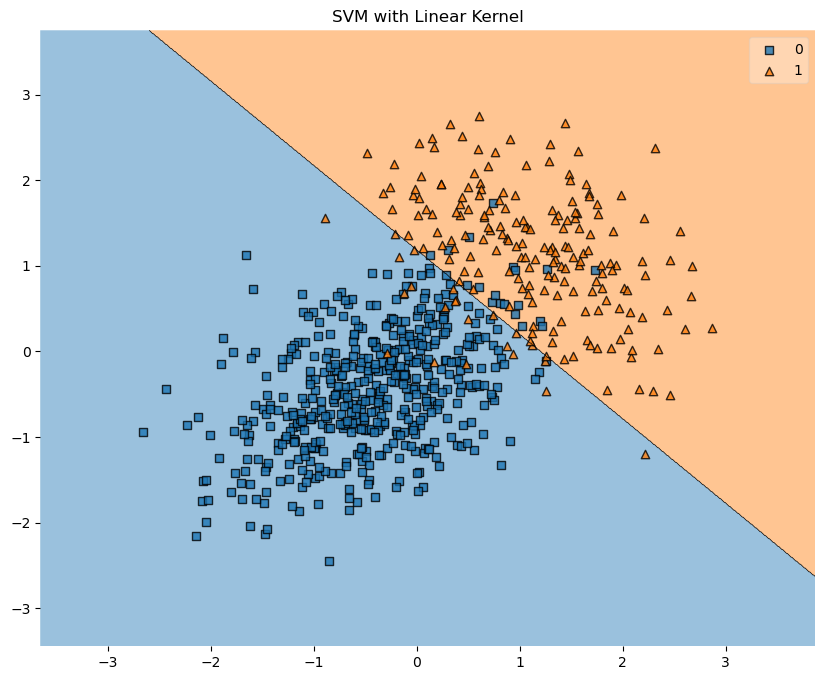

,Accuracy,AUC
Train,0.940000,0.922738
Test,0.916667,0.901804


In [22]:
# 모델링: SVM with linear Kernel
## 학습
C = 1    # SVM의 정규화 hyperparameter
model_svm = SVC(kernel='linear', C=C, random_state=123)
model_svm.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svm)
plt.title('SVM with Linear Kernel')
plt.show()
## 예측
Y_trpred = model_svm.predict(X_train)
Y_tepred = model_svm.predict(X_test)

# 성능검증
eval_svm = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_svm

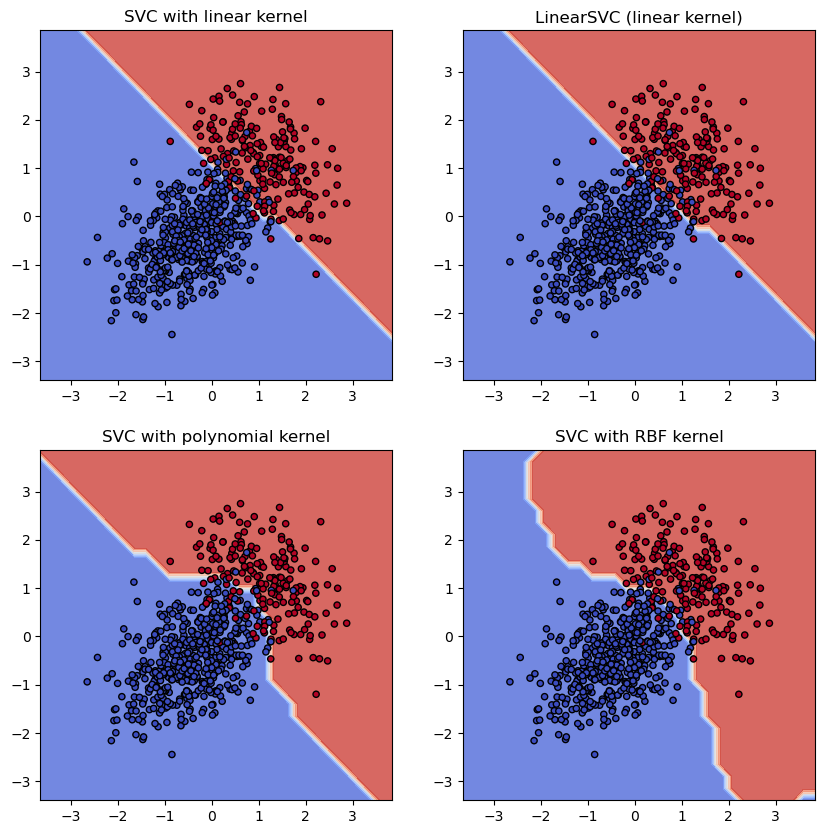

In [23]:
# SVM 선형 및 비선형 알고리즘 Classification 결과 비교
# kernel='linear' 대신 LinearSVC가 존재하지만 비용함수와 알고리즘 차이가 있어 결과 차이 존재
# 모델링 정리
C = 1    # SVM의 정규화 hyperparameter
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C, max_iter=10000),
          SVC(kernel='poly', gamma='auto', C=C),
          SVC(kernel='rbf', gamma='auto', C=C))
model_svm_kernel = (model_svm.fit(X_train, Y_train) for model_svm in models)

## 데이터 3차원 인식으로 재정리
X_train_min, X_train_max = X_train.min()-1, X_train.max()+1
X_test_min, X_test_max = X_test.min()-1, X_test.max()+1
xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max, 0.25), np.arange(X_test_min, X_test_max, 0.25))

## 결과비교 시각화
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

titles = ('SVC with linear kernel', 'LinearSVC (linear kernel)',
          'SVC with polynomial kernel', 'SVC with RBF kernel')
for clf, title, ax in zip(model_svm_kernel, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
plt.show()

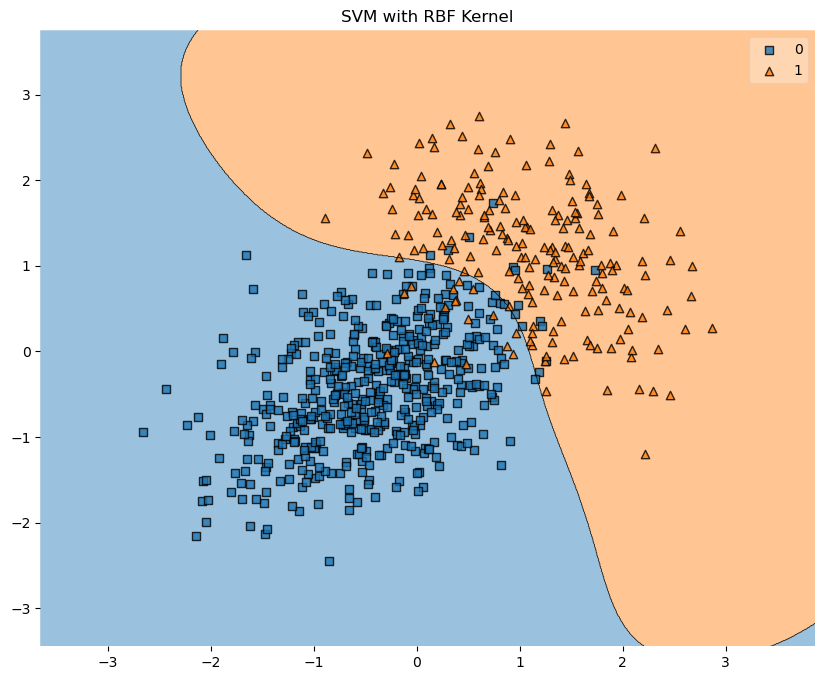

,Accuracy,AUC
Train,0.955714,0.944480
Test,0.916667,0.901804


In [24]:
# 모델링: SVM with RBF Kernel
## 학습
C = 1    # SVM의 정규화 hyperparameter
model_svmr = SVC(kernel='rbf', C=C, random_state=123)
model_svmr.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svmr)
plt.title('SVM with RBF Kernel')
plt.show()
## 예측
Y_trpred = model_svmr.predict(X_train)
Y_tepred = model_svmr.predict(X_test)

# 성능검증
eval_svmr = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_svmr

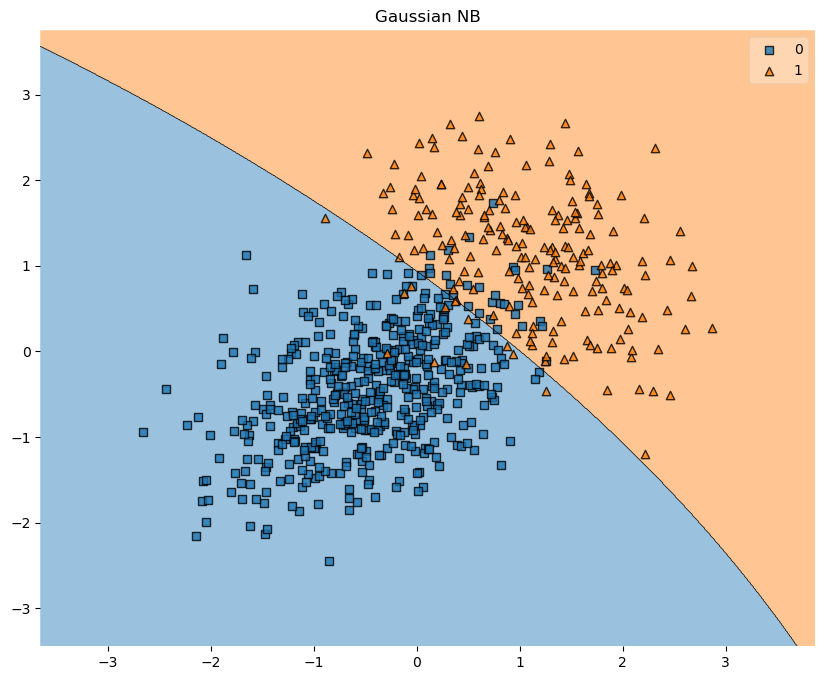

,Accuracy,AUC
Train,0.941429,0.940716
Test,0.920000,0.915923


In [25]:
# 모델링: NB
## 학습
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_gnb)
plt.title('Gaussian NB')
plt.show()
## 예측
Y_trpred = model_gnb.predict(X_train)
Y_tepred = model_gnb.predict(X_test)

# 성능검증
eval_gnb = evaluation_class_AccuracyAUC(Y_train, Y_trpred, Y_test, Y_tepred)
eval_gnb

,Accuracy,AUC
Logistic,0.916667,0.901804
KNN,0.913333,0.885368
SVM_Linear,0.916667,0.901804
SVM_RBF,0.916667,0.901804
NB,0.920000,0.915923


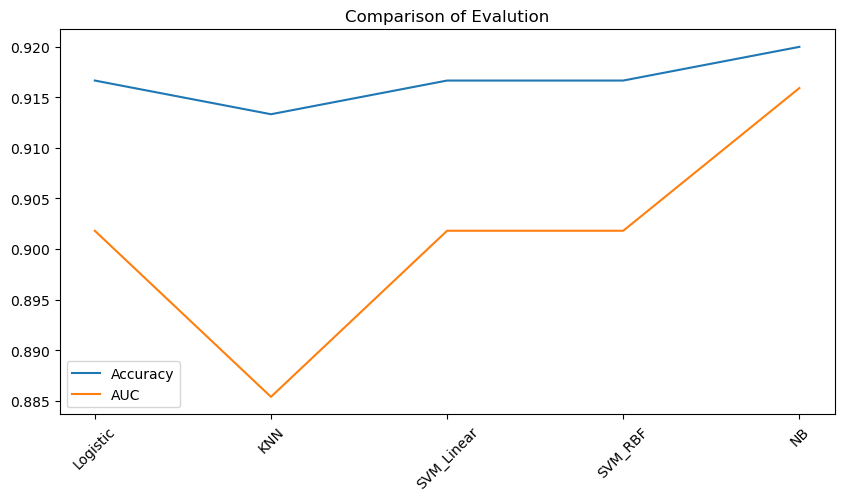

In [26]:
# 결과비교
labels = ['Logistic', 'KNN', 'SVM_Linear', 'SVM_RBF', 'NB']
models = [eval_logitreg, eval_knn, eval_svm, eval_svmr, eval_gnb]
result_classification = pd.DataFrame()
for result in models:
    result_classification = pd.concat([result_classification, result.iloc[1:,:]], axis=0)
result_classification.index = labels
display(result_classification)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_classification)
plt.title('Comparison of Evalution')
plt.xticks(rotation=45)
plt.legend(['Accuracy', 'AUC'])
plt.show()